# Основы программирования в Python

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [3]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [4]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [5]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [8]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [9]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [ ]:
soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [ ]:
for link in soup.find_all('a'):
    print(link.get('href'))

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2018/12/06/paper',
 '/news/2018/12/06/fluoxetine-on-functional-performance',
 '/news/2018/12/06/uv-sensor',
 '/news/2018/12/06/schizo-vitamin-d',
 '/news/2018/12/06/missile',
 '/news/2018/12/06/biodegradation',
 '/news/2018/12/06/microplastics-gut',
 '/news/2018/12/06/simulator',
 '/news/2018/12/06/still-got-it',
 '/news/2018/12/06/noncodingcancer',
 '/news/2018/12/06/raider',
 '/news/2018/12/05/failure',
 '/news/2018/12/05/negative-creation',
 '/news/2018/12/05/crs-16',
 '/news/2018/12/05/ichthyosaur',
 '/news/2018/12/05/3d-debut',
 '/news/2018/12/05/benny-at-19-km',
 '/news/2018/12/05/self-driving-plant',
 '/news/2018/12/05/wheelie-7',
 '/news/2018/12/03/trash-of-early-solar-system',
 '/news/2018/12/05/potts',
 '/news/2018/11/27/wafer-perfo-graphen',
 '/news/2018/12/03/wi-fi-analog',
 '/news/2018/12/05/negative-creation',
 '/news/2018/11/28/sound-cooling',
 '/news/2018/11/26/bose-fermi-condensate',
 '/news/2018/11/26/kinesin-efficiency',
 '/news/2018/11/26/coffee-rim']

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [11]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2018/12/06/paper',
 'https://nplus1.ru/news/2018/12/06/fluoxetine-on-functional-performance',
 'https://nplus1.ru/news/2018/12/06/uv-sensor',
 'https://nplus1.ru/news/2018/12/06/schizo-vitamin-d',
 'https://nplus1.ru/news/2018/12/06/missile',
 'https://nplus1.ru/news/2018/12/06/biodegradation',
 'https://nplus1.ru/news/2018/12/06/microplastics-gut',
 'https://nplus1.ru/news/2018/12/06/simulator',
 'https://nplus1.ru/news/2018/12/06/still-got-it',
 'https://nplus1.ru/news/2018/12/06/noncodingcancer',
 'https://nplus1.ru/news/2018/12/06/raider',
 'https://nplus1.ru/news/2018/12/05/failure',
 'https://nplus1.ru/news/2018/12/05/negative-creation',
 'https://nplus1.ru/news/2018/12/05/crs-16',
 'https://nplus1.ru/news/2018/12/05/ichthyosaur',
 'https://nplus1.ru/news/2018/12/05/3d-debut',
 'https://nplus1.ru/news/2018/12/05/benny-at-19-km',
 'https://nplus1.ru/news/2018/12/05/self-driving-plant',
 'https://nplus1.ru/news/2018/12/05/wheelie-7',
 'https://nplus1.ru/new

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [29]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [30]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2018-12-06" itemprop="datePublished"/>,
 <meta content="Елизавета Ивтушок" name="mediator_author"/>,
 <meta content="При этом препарат уменьшил симптомы депрессии и увеличил количество переломов" name="description"/>,
 <meta content="Елизавета Ивтушок" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Популярный антидепрессант оказался бесполезным для восстановления после инсульта" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2018/12/06/5138485e959e890a5aa0f407f10b2b18.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2018/12/06/fluoxetine-on-functional-performance" property="og:url"/>,
 <meta content="При этом препарат уменьшил симп

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [31]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Елизавета Ивтушок" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [32]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Елизавета Ивтушок" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [33]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Елизавета Ивтушок'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [34]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Елизавета Ивтушок'

Аналогичным образом извлечем дату, заголовок и описание.

In [35]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [36]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="medicine" href="/rubric/medicine">Медицина</a>
 </p>, <p class="table">
 <a href="/news/2018/12/06">
 <time content="2018-12-06" itemprop="datePublished">
 <span>17:17</span>
 <span>06 Дек. 2018</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.1">
 <span>Сложность</span>
 <span class="difficult-value">2.1</span>
 </a>
 </p>, <p class="title">Структура флуоксетина</p>, <p class="credits"></p>, <p>Британские ученые в ходе масштабного исследования опровергли пользу популярного антидепрессанта флуоксетина для восстановления функциональности пациентов после инсульта. В ходе их исследования у участников, принимавших препарат в течение полугода, не наблюдалось улучшений физической формы по сравнению с плацебо-группой. Статья <a href="https://www.sciencedirect.com/science/article/pii/S014067361832823X?via%3Dihub#!" rel="nofollow" target="_blank">опубликована</a> в <i>The Lancet</i>.</p>, <p><a href="https://ru.wikipedia.org/wiki/%D0%A4%D

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [37]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="medicine" href="/rubric/medicine">Медицина</a>]

Получился список из двух элементов. Применим списковые включения – вытащим из каждого элемента текст и поместим его в новый список `rubrics`.

In [38]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Медицина']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [39]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.1</span>]

И выберем оттуда текст.

In [40]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.1'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [41]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [42]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [43]:
final_text = ' '.join(text)
final_text

'Британские ученые в ходе масштабного исследования опровергли пользу популярного антидепрессанта флуоксетина для восстановления функциональности пациентов после инсульта. В ходе их исследования у участников, принимавших препарат в течение полугода, не наблюдалось улучшений физической формы по сравнению с плацебо-группой. Статья опубликована в The Lancet. Флукосетин — антидепрессант из группы селективных ингибиторов обратного захвата серотонина — зачастую прописывают пациентам, которые проходят длительный курс реабилитации с целью снизить риск развития депрессии и тревожного расстройства. Также считалось, что при реабилитации пациентов после инсульта флуоксетин может помочь восстановить физическую форму за счет усиления процесса нейрогенеза и улучшения нейропластичности (вследствие улучшения синтеза и работы серотонина), а также благодаря стимулирующему воздействию препарата. Клиническая эффективность флуоксетина в качестве средства для восстановления функциональности до сих пор не была

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [44]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [47]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [45]:
from time import sleep

In [48]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [49]:
news[0]

('https://nplus1.ru/news/2018/12/06/paper',
 '2018-12-06',
 'Григорий Копиев',
 'Изображения на такой бумаге можно стереть, поместив ее в морозильную камеру',
 'Китайцы создали долговременную перезаписываемую бумагу',
 'Китайские исследователи разработали перезаписываемую бумагу, менять цвет которой можно с\xa0помощью температуры или инфракрасного излучения. Бумага выдерживает более сотни циклов перезаписи с\xa0небольшим изменением насыщенности цвета, а\xa0записанные на\xa0нее изображения сохраняются на\xa0протяжении как минимум полугода, рассказывают авторы статьи в\xa0ACS Applied Materials &\xa0Interfaces. Существует немало технологий, призванных заменить собой обычную бумагу, которая до\xa0сих пор применяется повсеместно. К\xa0примеру, уже есть экспериментальные и\xa0серийные экраны, которые можно складывать и\xa0даже растягивать, не\xa0разрушая\xa0их. Кроме того, существует электронная бумага, не\xa0использующая собственную подсветку, и\xa0поэтому визуально напоминающая обычную бум

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [50]:
import pandas as pd

In [51]:
df = pd.DataFrame(news)

In [52]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2018/12/06/paper,2018-12-06,Григорий Копиев,"Изображения на такой бумаге можно стереть, пом...",Китайцы создали долговременную перезаписываему...,Китайские исследователи разработали перезаписы...,[Материалы],3.2
1,https://nplus1.ru/news/2018/12/06/fluoxetine-o...,2018-12-06,Елизавета Ивтушок,При этом препарат уменьшил симптомы депрессии ...,Популярный антидепрессант оказался бесполезным...,Британские ученые в ходе масштабного исследова...,[Медицина],2.1


Переименуем столбцы в базе.

In [53]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [54]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2018/12/06/paper,2018-12-06,Григорий Копиев,"Изображения на такой бумаге можно стереть, пом...",Китайцы создали долговременную перезаписываему...,Китайские исследователи разработали перезаписы...,[Материалы],3.2
1,https://nplus1.ru/news/2018/12/06/fluoxetine-o...,2018-12-06,Елизавета Ивтушок,При этом препарат уменьшил симптомы депрессии ...,Популярный антидепрессант оказался бесполезным...,Британские ученые в ходе масштабного исследова...,[Медицина],2.1


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [56]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [57]:
df.diffc.describe()

count    28.000000
mean      4.117857
std       2.251428
min       1.100000
25%       2.375000
50%       3.100000
75%       6.750000
max       8.900000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

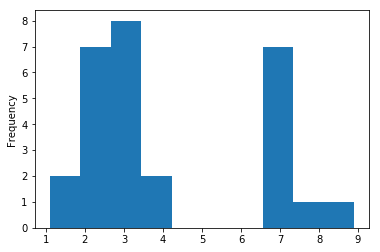

In [58]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [59]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [60]:
df.text[0]

'Китайские исследователи разработали перезаписываемую бумагу, менять цвет которой можно с\xa0помощью температуры или инфракрасного излучения. Бумага выдерживает более сотни циклов перезаписи с\xa0небольшим изменением насыщенности цвета, а\xa0записанные на\xa0нее изображения сохраняются на\xa0протяжении как минимум полугода, рассказывают авторы статьи в\xa0ACS Applied Materials &\xa0Interfaces. Существует немало технологий, призванных заменить собой обычную бумагу, которая до\xa0сих пор применяется повсеместно. К\xa0примеру, уже есть экспериментальные и\xa0серийные экраны, которые можно складывать и\xa0даже растягивать, не\xa0разрушая\xa0их. Кроме того, существует электронная бумага, не\xa0использующая собственную подсветку, и\xa0поэтому визуально напоминающая обычную бумагу. Тем не\xa0менее, пока эти технологии не\xa0достигли такой\xa0же стоимости, тонкости и\xa0других важных параметров, как у\xa0бумаги. Часть ученых и\xa0инженеров работают в\xa0другом направлении и\xa0пытаются создать

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [62]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [63]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [64]:
df.clean_text[0]

'Китайские исследователи разработали перезаписываемую бумагу, менять цвет которой можно с помощью температуры или инфракрасного излучения. Бумага выдерживает более сотни циклов перезаписи с небольшим изменением насыщенности цвета, а записанные на нее изображения сохраняются на протяжении как минимум полугода, рассказывают авторы статьи в ACS Applied Materials & Interfaces. Существует немало технологий, призванных заменить собой обычную бумагу, которая до сих пор применяется повсеместно. К примеру, уже есть экспериментальные и серийные экраны, которые можно складывать и даже растягивать, не разрушая их. Кроме того, существует электронная бумага, не использующая собственную подсветку, и поэтому визуально напоминающая обычную бумагу. Тем не менее, пока эти технологии не достигли такой же стоимости, тонкости и других важных параметров, как у бумаги. Часть ученых и инженеров работают в другом направлении и пытаются создать не замену бумаги, а ее более совершенную версию, в том числе перезап

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [65]:
df.to_excel('nplus-news.xlsx')